<a href="https://colab.research.google.com/github/ikabrain/UCS615-Image-Processing-Lab/blob/main/102303754_1_mst_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MST Lab File

---

## Initialising
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
# # Uncomment if using notebook locally from GitHub

# img_path = "./sample_images/sample_photo.jpg"

In [3]:
# Uncomment if uploading image for first time on Google Colab

from google.colab import files

uploaded = files.upload("sample_images/")
img_path = list(uploaded.keys())[0]

Saving sample_photo.jpg to sample_images/sample_photo.jpg


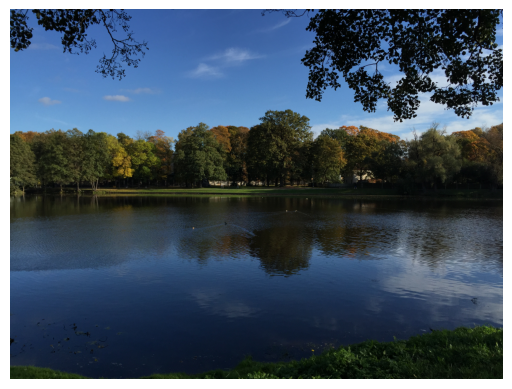

In [4]:
img = cv2.imread(img_path)

# Will only use plt.imshow() for displaying img inline as cv2_imshow() breaks on GitHub
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

## Q1. WAP to convert Grayscale image to binary image





---

For this, we use the function
```python
cv2.threshold(src, thresh_val, max_val, type_of_img) -> thresh_value, img
```

In [5]:
gray_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) # Reads image as grayscale

### Case - 1: Assume Mean Intensity Image as Threshold value

In [6]:
# CASE-1

mean_val = np.uint8(np.mean(gray_img))
print(f"Mean Intensity = {mean_val}")

thresh, bin_img_mean = cv2.threshold(gray_img, mean_val, 255, cv2.THRESH_BINARY)
print(f"\nThreshold Value = {thresh}")

Mean Intensity = 64

Threshold Value = 64.0


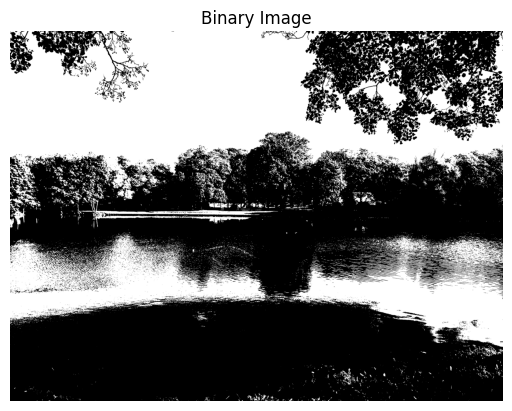

In [7]:
plt.title("Binary Image")
plt.imshow(bin_img_mean, cmap="gray")
plt.axis("off")
plt.show()

### Case - 2: Input the threshold value from user

In [8]:
try:
    user_thresh = int(input("Enter a threshold value: "))
except ValueError:
    print("Invalid threshold type")

Enter a threshold value: 120


In [9]:
thresh, bin_img = cv2.threshold(gray_img, user_thresh, 255, cv2.THRESH_BINARY)
print(f"\nThreshold Value = {thresh}")


Threshold Value = 120.0


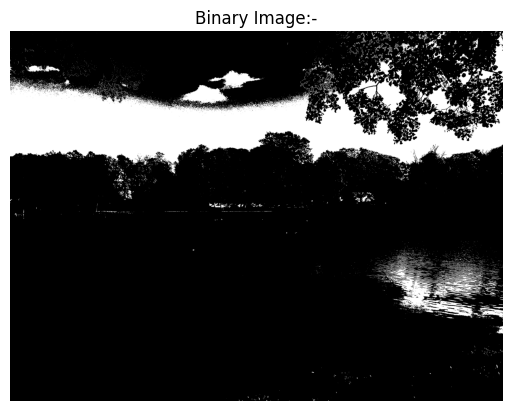

In [10]:
plt.title("Binary Image")
plt.imshow(bin_img, cmap="gray")
plt.axis("off")
plt.show()

### Final Plot

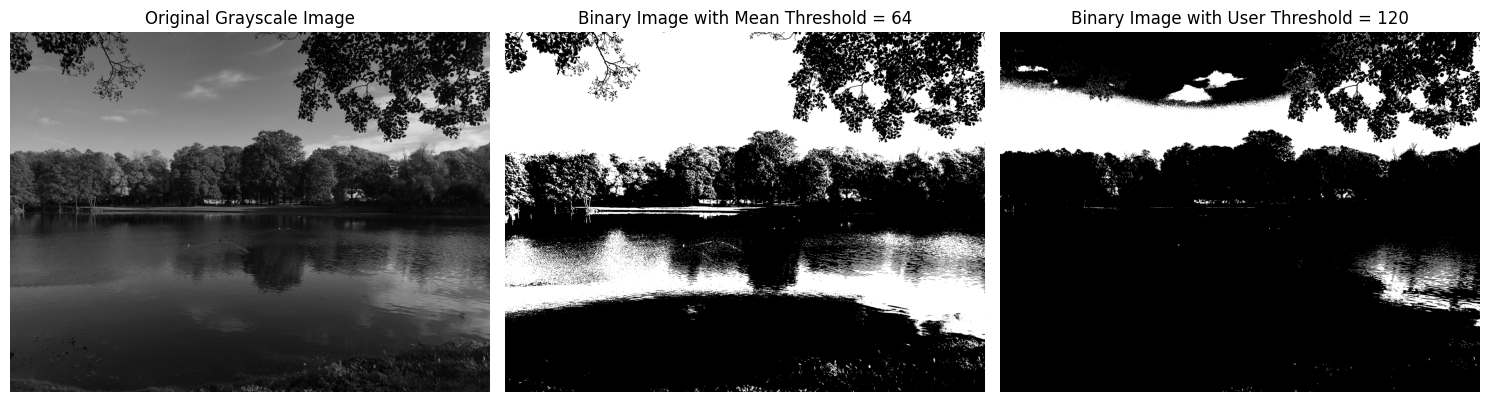

In [11]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gray_img, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(bin_img_mean, cmap="gray")
plt.title(f"Binary Image with Mean Threshold = {mean_val}")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(bin_img, cmap="gray")
plt.title(f"Binary Image with User Threshold = {user_thresh}")
plt.axis("off")

plt.tight_layout()
plt.show()

## Q2. WAP to convert RGB (Color) Image to Grayscale Image

---

### Case 1: By taking mean average of three planes.

In [12]:
gray_mean = np.round(np.mean(img, axis=2)).astype(np.uint8) # Gets mean along the THIRD axis i.e. B,G,R planes!

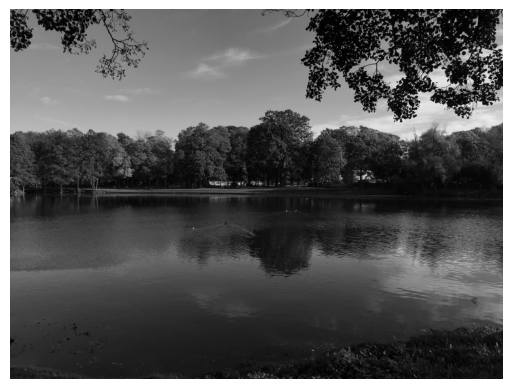

In [13]:
plt.title("Mean Grayscale Image")
plt.imshow(gray_mean, cmap="gray")
plt.axis("off")
plt.show()

### Case 2: Input the weightage of three planes, i.e., R, G, B from the user.

The weightage is a value between 0 and 1, and sum of all three weightages is equal to 1.
(Example: Weightage of R, G, B is 0.7, 0.2, 0.1, respectively)

In [14]:
import math

In [15]:
try:
    R_w = float(input("Enter the weightage of Red   component: "))
    G_w = float(input("Enter the weightage of Green component: "))
    B_w = float(input("Enter the weightage of Blue  component: "))
except ValueError as e:
    raise ValueError("Please enter a valid float quantity.")

if not math.isclose(R_w + G_w + B_w, 1.0, abs_tol=1e-12):
    raise ValueError("Sum of all weightages should be equal to 1.")

Enter the weightage of Red   component: 0.7
Enter the weightage of Green component: 0.2
Enter the weightage of Blue  component: 0.1


In [16]:
B, G, R = img[:, :, 0], img[:, :, 1], img[:, :, 2]

gray_weighted = np.round((B_w * B) + (G_w * G) + (R_w * R)).astype(np.uint8)

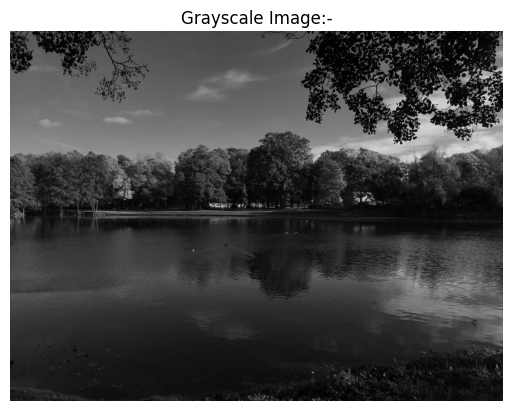

In [17]:
plt.title("Weighted Grayscale Image")
plt.imshow(gray_weighted, cmap="gray")
plt.axis("off")
plt.show()

In [19]:
# SHORTCUT: Use cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)